## Basic 
* Necessary libraries for data manipulation and visualization

In [1]:
# Import the necessary libraries for data manipulation and visualization
import numpy as np              # Library for numerical operations
import pandas as pd             # Library for data manipulation and analysis
import matplotlib.pyplot as plt # Library for creating static, animated, and interactive visualizations
import seaborn as sns 

In [2]:
df = pd.read_csv('Korba.csv')  # tmax: Daily maximum temperature (°C)     tmin: Daily minimum temperature (°C)      rain: Daily rainfall (mm)
df

,DateTime,tmin,tmax,rain
0,1951-01-01,9.8700,25.0300,0.0
1,1951-01-02,8.0900,23.4200,0.0
2,1951-01-03,6.8700,23.3500,0.0
3,1951-01-04,7.3200,24.0300,0.0
4,1951-01-05,8.0600,24.5300,0.0
...,...,...,...,...
27024,2024-12-27,16.8001,30.6949,0.0
27025,2024-12-28,17.6059,28.5722,0.0
27026,2024-12-29,17.3349,27.9999,0.0
27027,2024-12-30,16.4407,27.4137,0.0


### Extreme events graphs

### tmin

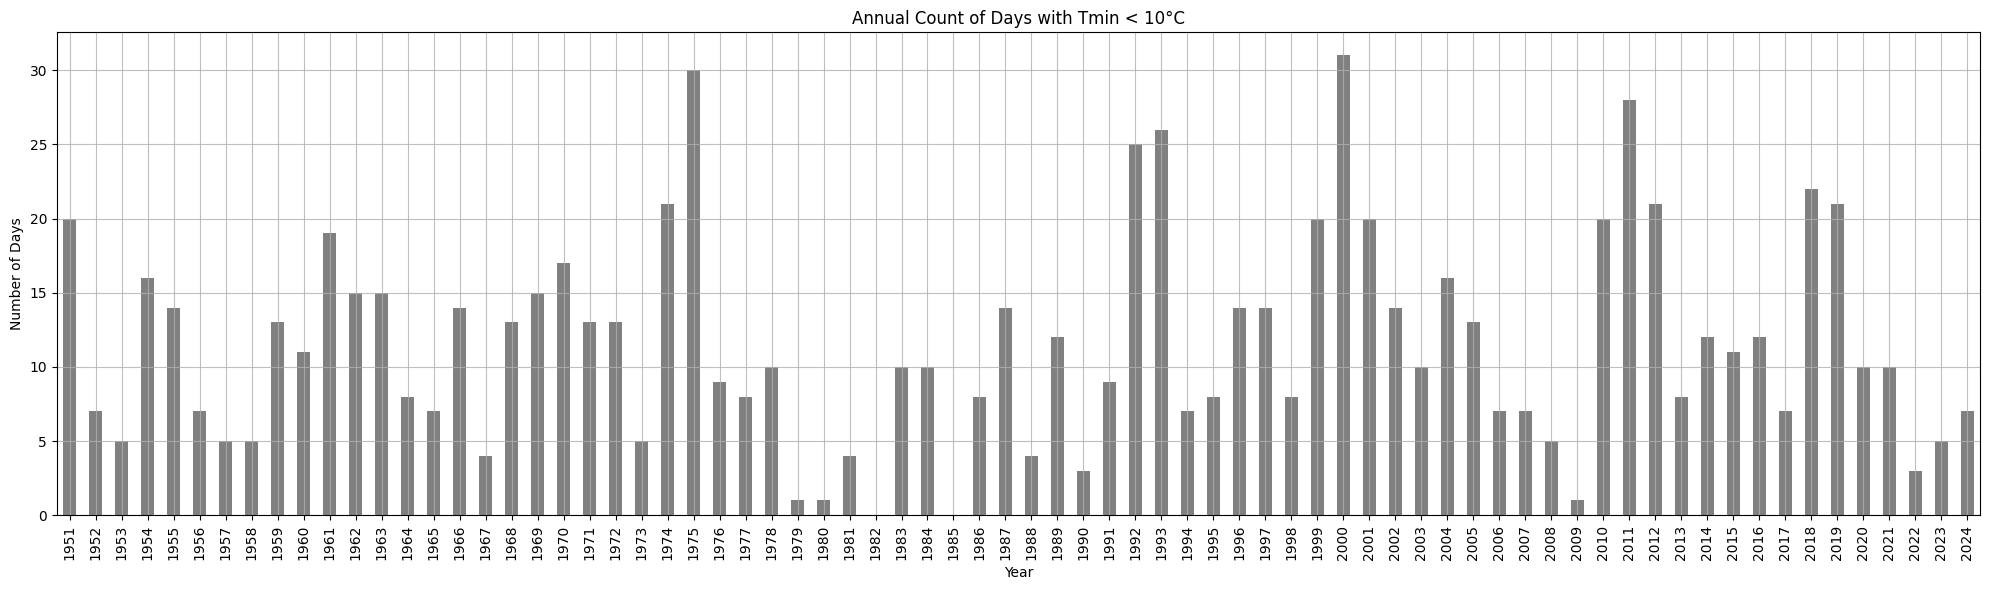

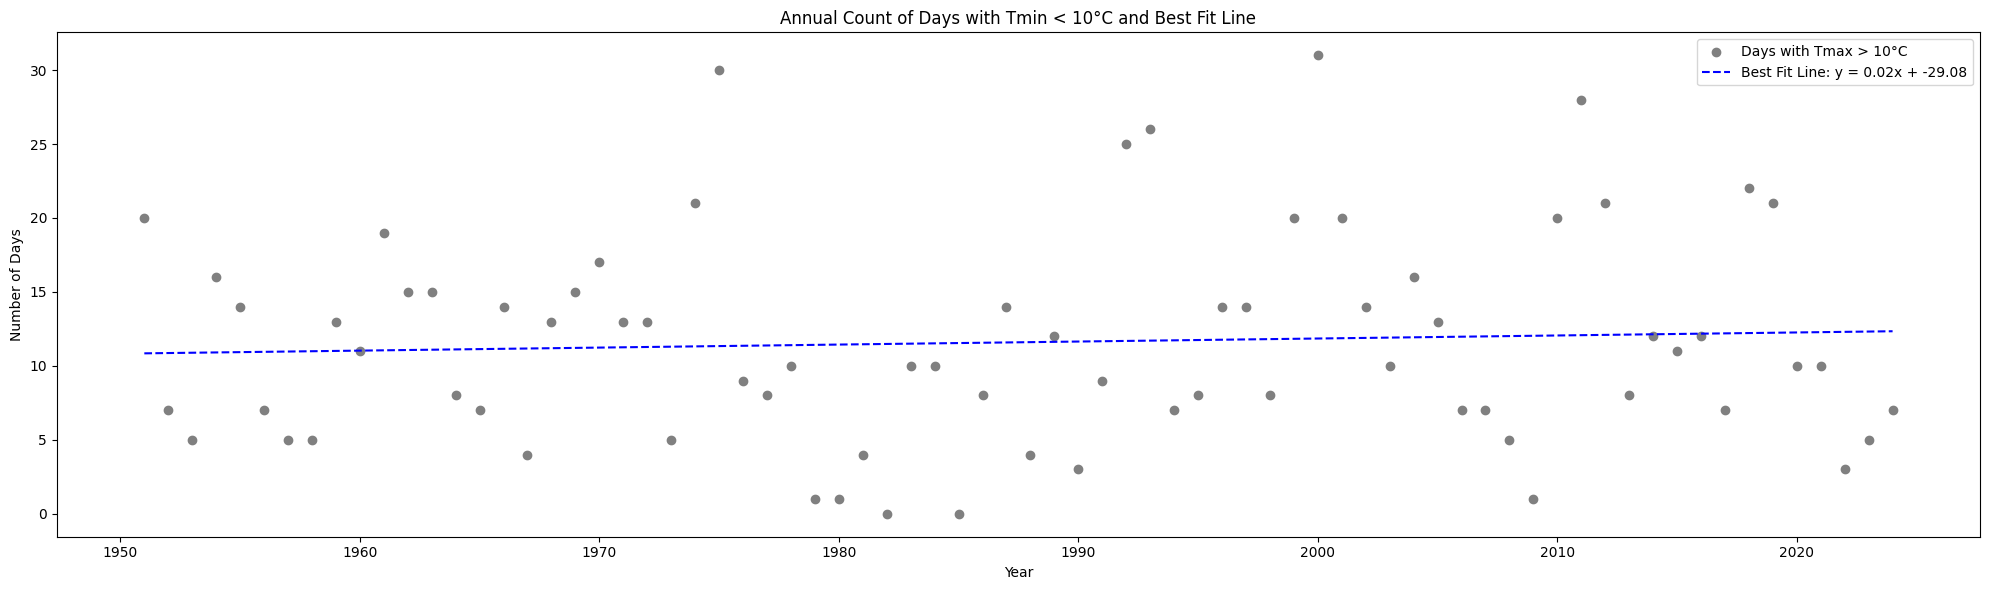

Equation of the best fit line: y = 0.02x + -29.08


In [3]:
x = 10  # You can set any temperature threshold here

tmin = df['tmin']
# Ensure DateTime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Count the number of days each year where tmax > x°C
tmin_below_x = tmin < x
annual_count_below_x = tmin_below_x.groupby(df['DateTime'].dt.year).sum()

# Plot the bar graph
plt.figure(figsize=(20, 6))
annual_count_below_x.plot(kind='bar', color='grey')
plt.title(f'Annual Count of Days with Tmin < {x}°C')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.grid(alpha=0.8)
plt.show()

# Scatter plot and best fit line for annual_count_below_x
years = annual_count_below_x.index.values
counts = annual_count_below_x.values

# Linear regression for best fit line
coefficients = np.polyfit(years, counts, 1)
slope, intercept = coefficients
best_fit_line = slope * years + intercept

plt.figure(figsize=(20, 6))
plt.scatter(years, counts, color='grey', label=f'Days with Tmax > {x}°C')
plt.plot(years, best_fit_line, color='blue', linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Annual Count of Days with Tmin < {x}°C and Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {slope:.2f}x + {intercept:.2f}")

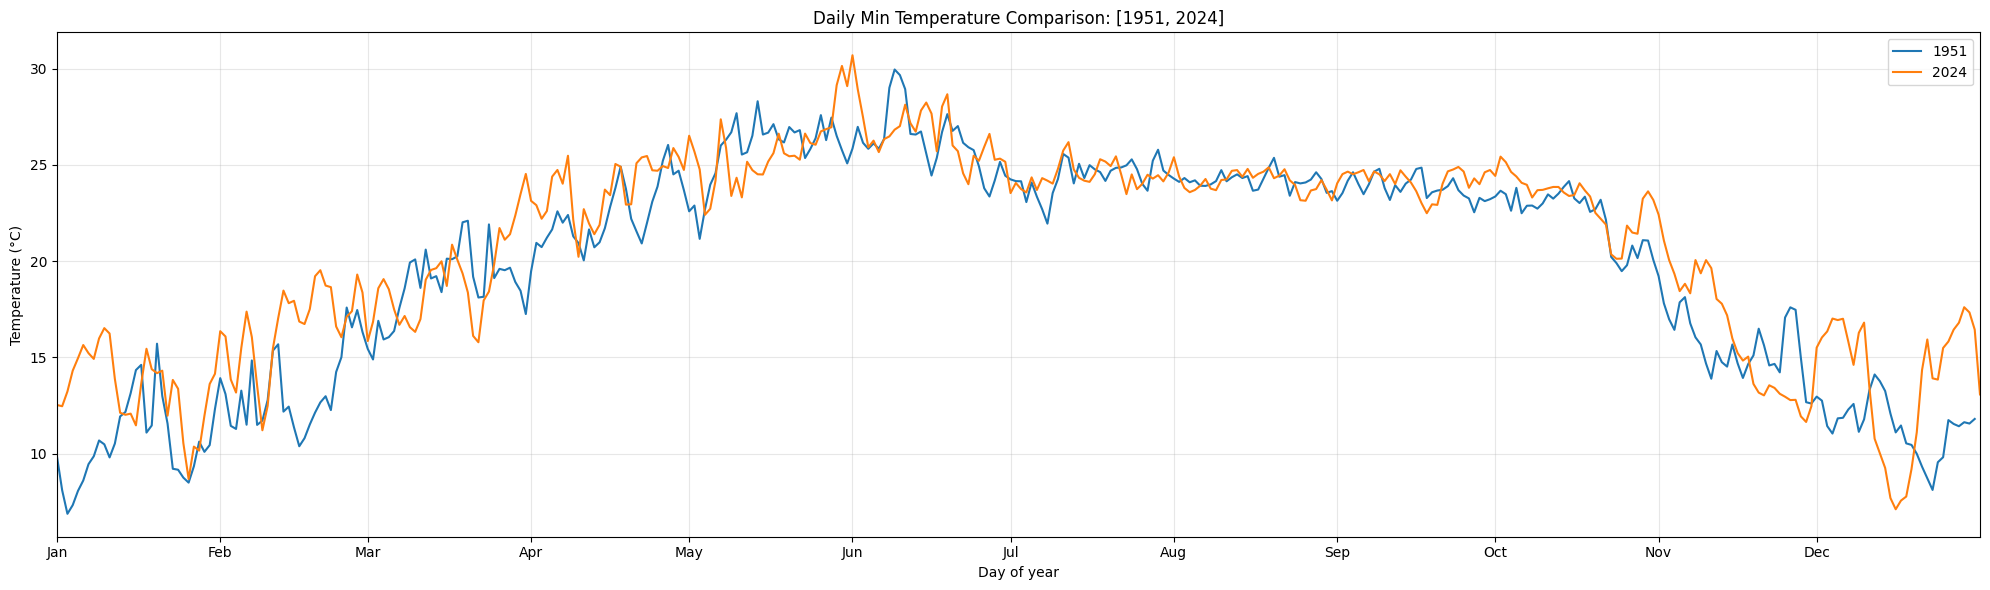

In [4]:
years = [1951, 2024]
plt.figure(figsize=(20, 6))

# Use a full 1.2.366 day-of-year index so leap-year series align on the plot
full_days = np.arange(1, 367)

for y in years:
    yr_df = df[df['DateTime'].dt.year == y]
    if yr_df.empty:
        print(f"No data for year {y}")
        continue
    # Aggregate by day-of-year (sum in case of multiple records per day)
    daily_rain = yr_df.groupby(yr_df['DateTime'].dt.dayofyear)['tmin'].sum()
    # Reindex to full range so lines align; missing days become NaN
    daily_rain = daily_rain.reindex(full_days)
    plt.plot(full_days, daily_rain, label=str(y), linewidth=1.5)

# X-axis: month tick positions (use a non-leap reference for consistent month starts)
month_starts = pd.to_datetime([f'2001-{m:02d}-01' for m in range(1, 13)]).dayofyear
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)

plt.xlim(1, 366)
plt.xlabel('Day of year')
plt.ylabel('Temperature (°C)')
plt.title(f'Daily Min Temperature Comparison: {years}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### tmax

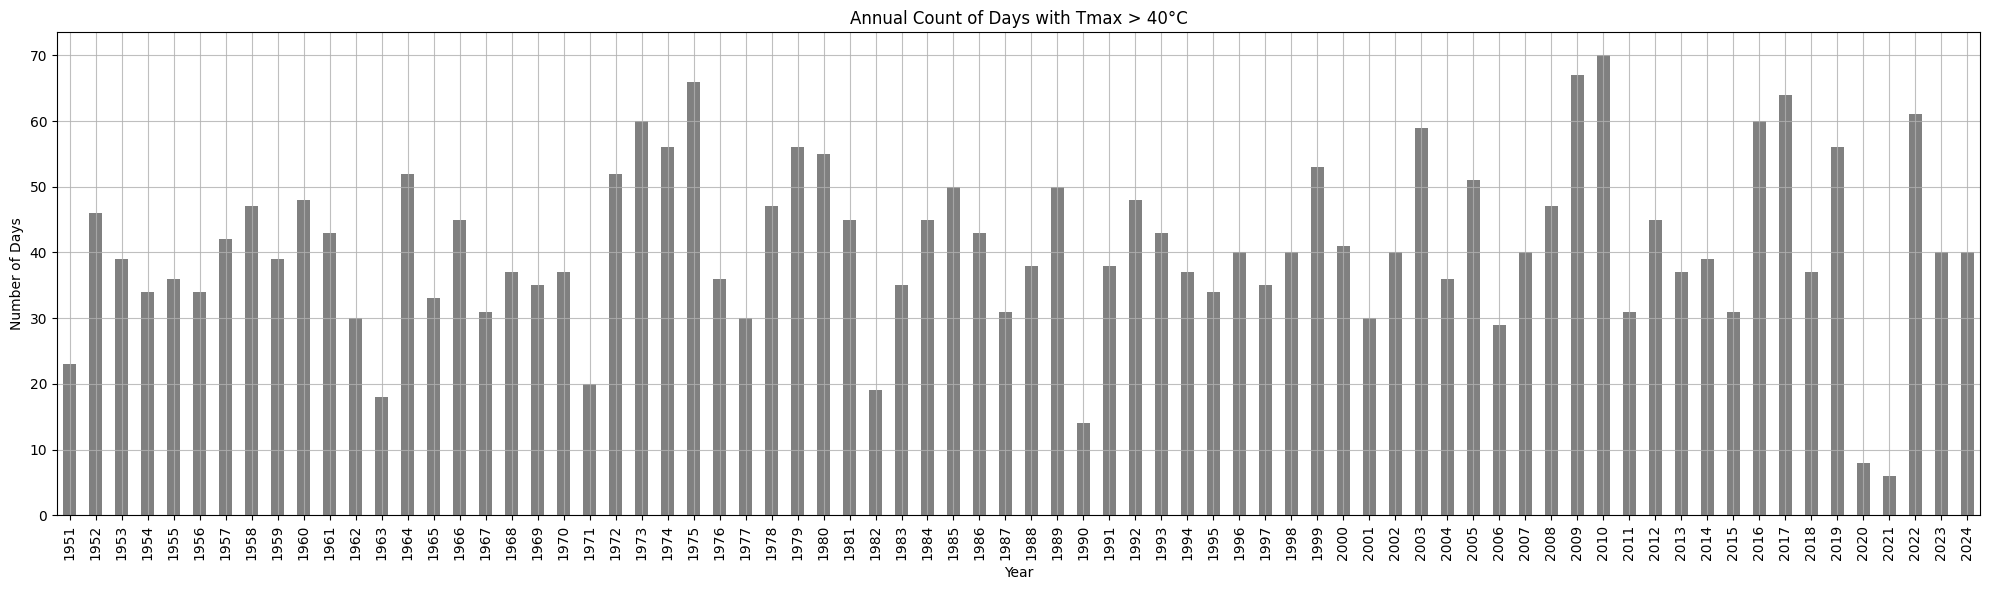

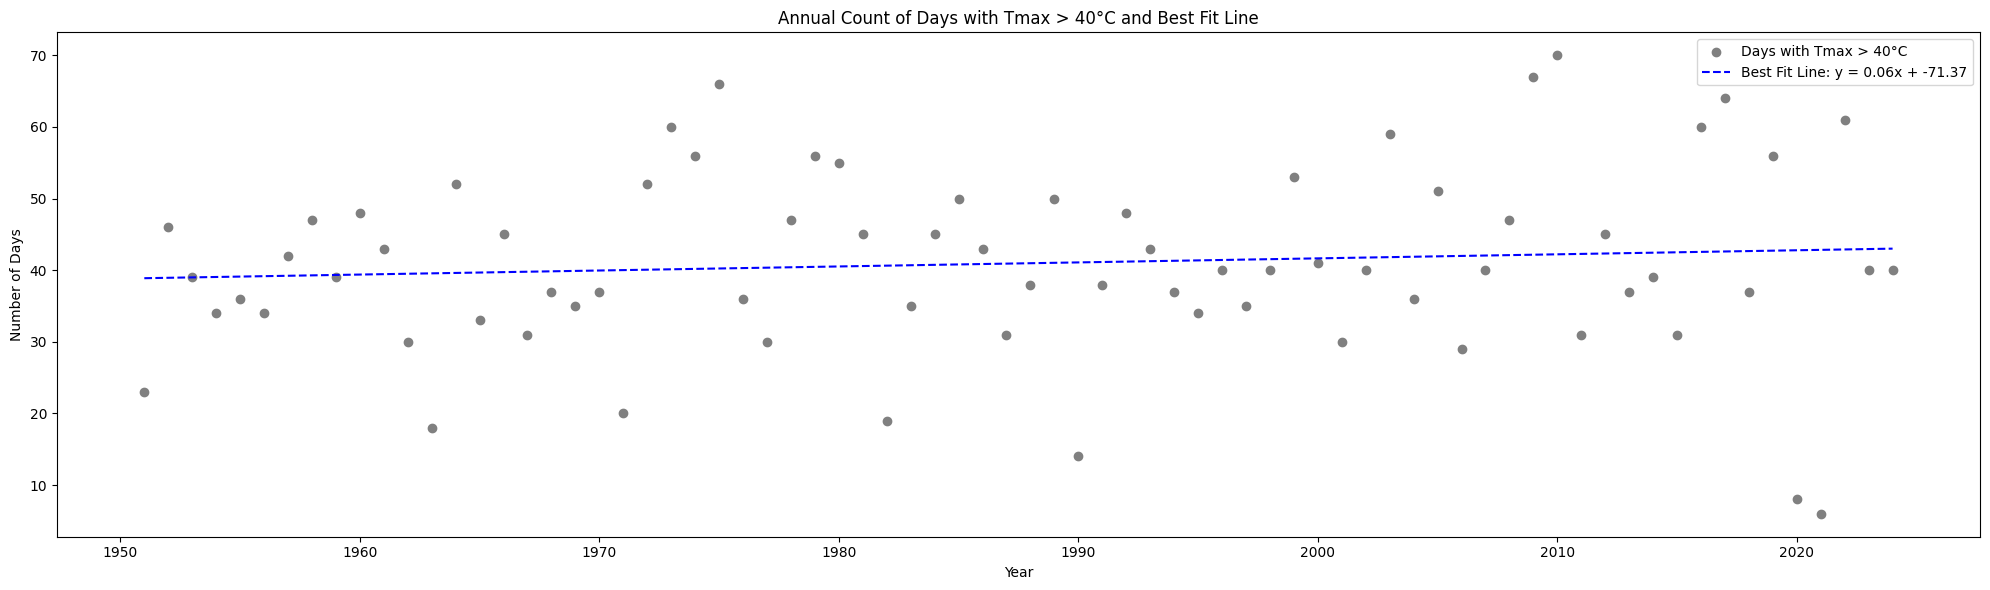

Equation of the best fit line: y = 0.06x + -71.37


In [5]:
x = 40  # You can set any temperature threshold here

tmax = df['tmax']
# Ensure DateTime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Count the number of days each year where tmax > x°C
tmax_above_x = tmax > x
annual_count_above_x = tmax_above_x.groupby(df['DateTime'].dt.year).sum()

# Plot the bar graph
plt.figure(figsize=(20, 6))
annual_count_above_x.plot(kind='bar', color='grey')
plt.title(f'Annual Count of Days with Tmax > {x}°C')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.grid(alpha=0.8)
plt.show()

# Scatter plot and best fit line for annual_count_above_x
years = annual_count_above_x.index.values
counts = annual_count_above_x.values

# Linear regression for best fit line
coefficients = np.polyfit(years, counts, 1)
slope, intercept = coefficients
best_fit_line = slope * years + intercept

plt.figure(figsize=(20, 6))
plt.scatter(years, counts, color='grey', label=f'Days with Tmax > {x}°C')
plt.plot(years, best_fit_line, color='blue', linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Annual Count of Days with Tmax > {x}°C and Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {slope:.2f}x + {intercept:.2f}")

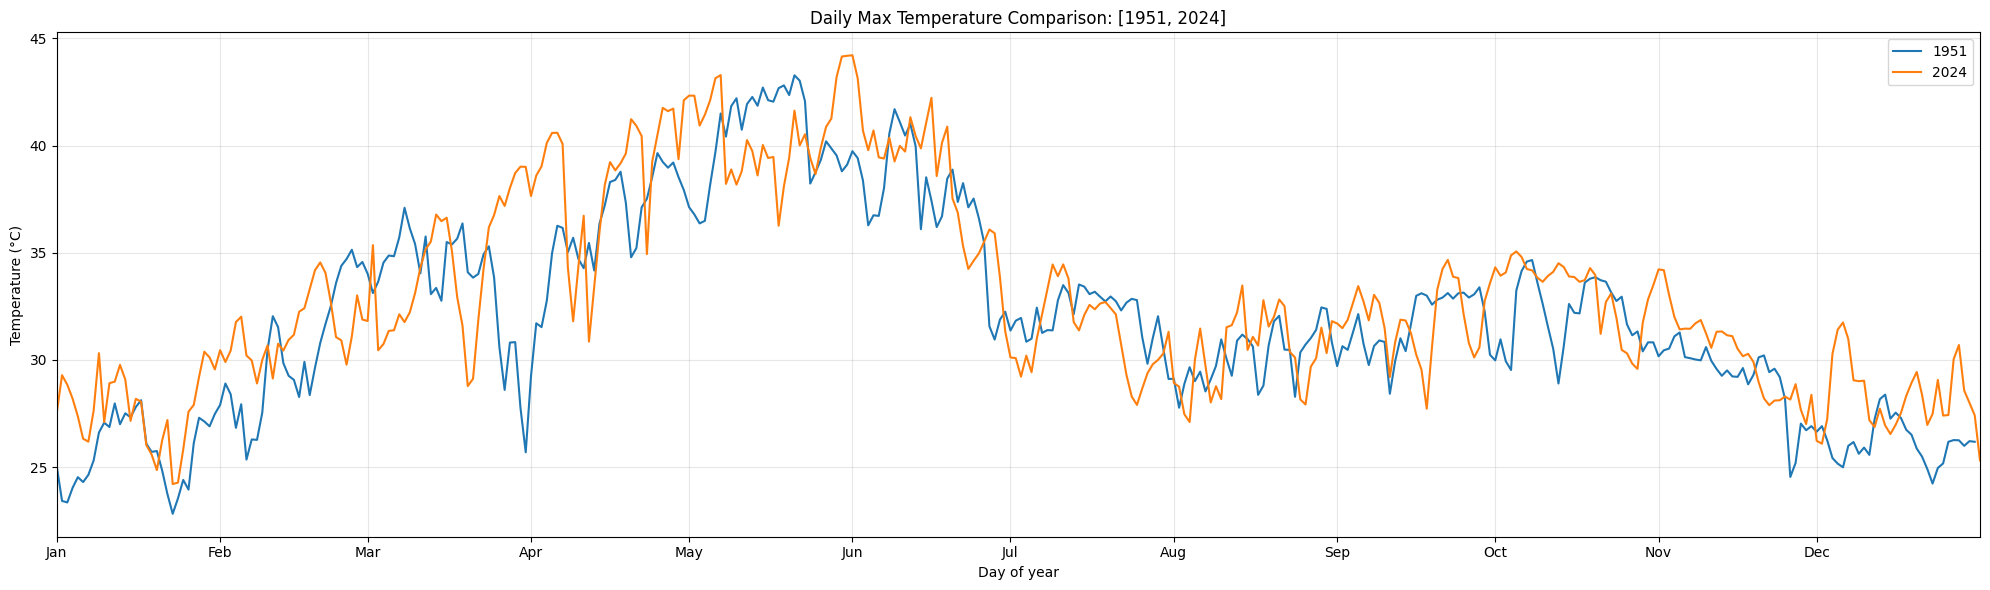

In [6]:
years = [1951, 2024]
plt.figure(figsize=(20, 6))

# Use a full 1.2.366 day-of-year index so leap-year series align on the plot
full_days = np.arange(1, 367)

for y in years:
    yr_df = df[df['DateTime'].dt.year == y]
    if yr_df.empty:
        print(f"No data for year {y}")
        continue
    # Aggregate by day-of-year (sum in case of multiple records per day)
    daily_rain = yr_df.groupby(yr_df['DateTime'].dt.dayofyear)['tmax'].sum()
    # Reindex to full range so lines align; missing days become NaN
    daily_rain = daily_rain.reindex(full_days)
    plt.plot(full_days, daily_rain, label=str(y), linewidth=1.5)

# X-axis: month tick positions (use a non-leap reference for consistent month starts)
month_starts = pd.to_datetime([f'2001-{m:02d}-01' for m in range(1, 13)]).dayofyear
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)

plt.xlim(1, 366)
plt.xlabel('Day of year')
plt.ylabel('Temperature (°C)')
plt.title(f'Daily Max Temperature Comparison: {years}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### rain

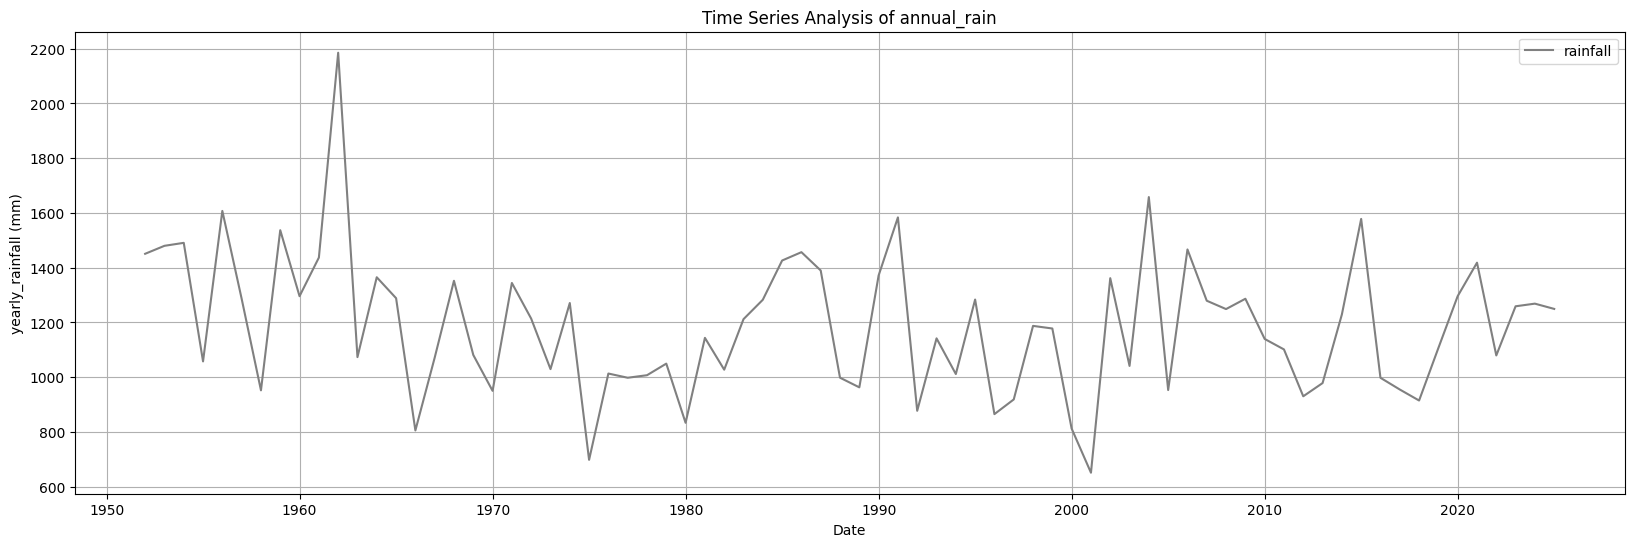

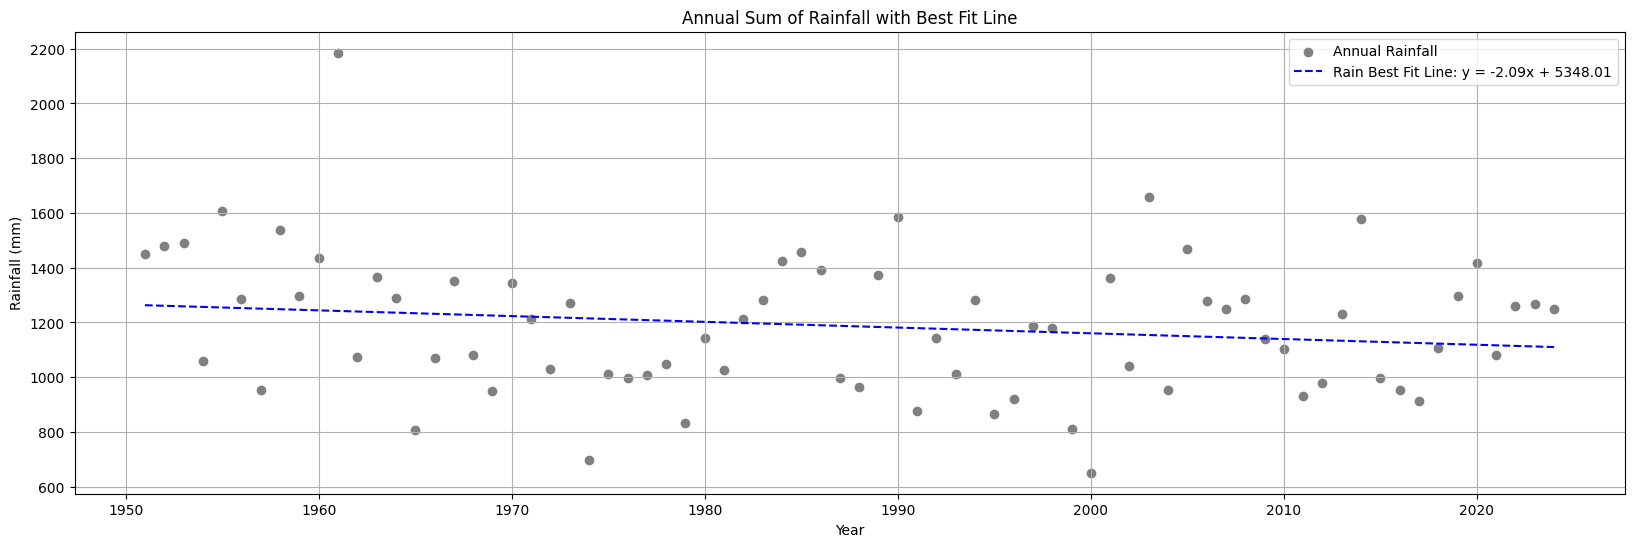

Equation of the best fit line for Rain: y = -2.09x + 5348.01


In [7]:
# Set DateTime as index for resampling
df_index = df.set_index('DateTime')

plt.figure(figsize=(20, 6))
# use df_tmin which already has DateTime as the index
annual_rain = df_index.resample('YE').sum()  # resample the DataFrame so 'rain' column is available
plt.plot(annual_rain.index, annual_rain['rain'], label='rainfall', color='grey')
plt.title('Time Series Analysis of annual_rain')
plt.xlabel('Date')
plt.ylabel('yearly_rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


annual_sum = df_index.resample('YE').sum()
# Extract the years and rainfall values
years = annual_sum.index.year
annual_rain = annual_sum['rain'].values

# Perform linear regression to find the best fit line for rainfall
coefficients_rain = np.polyfit(years, annual_rain, 1)
slope_rain, intercept_rain = coefficients_rain
best_fit_line_rain = slope_rain * years + intercept_rain

# Plot the data and the best fit lines
plt.figure(figsize=(20, 6))
plt.scatter(years, annual_rain, color='grey', label='Annual Rainfall')
plt.plot(years, best_fit_line_rain, color='blue', linestyle='--', label=f'Rain Best Fit Line: y = {slope_rain:.2f}x + {intercept_rain:.2f}')
plt.title('Annual Sum of Rainfall with Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Print the equation of the best fit line
print(f"Equation of the best fit line for Rain: y = {slope_rain:.2f}x + {intercept_rain:.2f}")

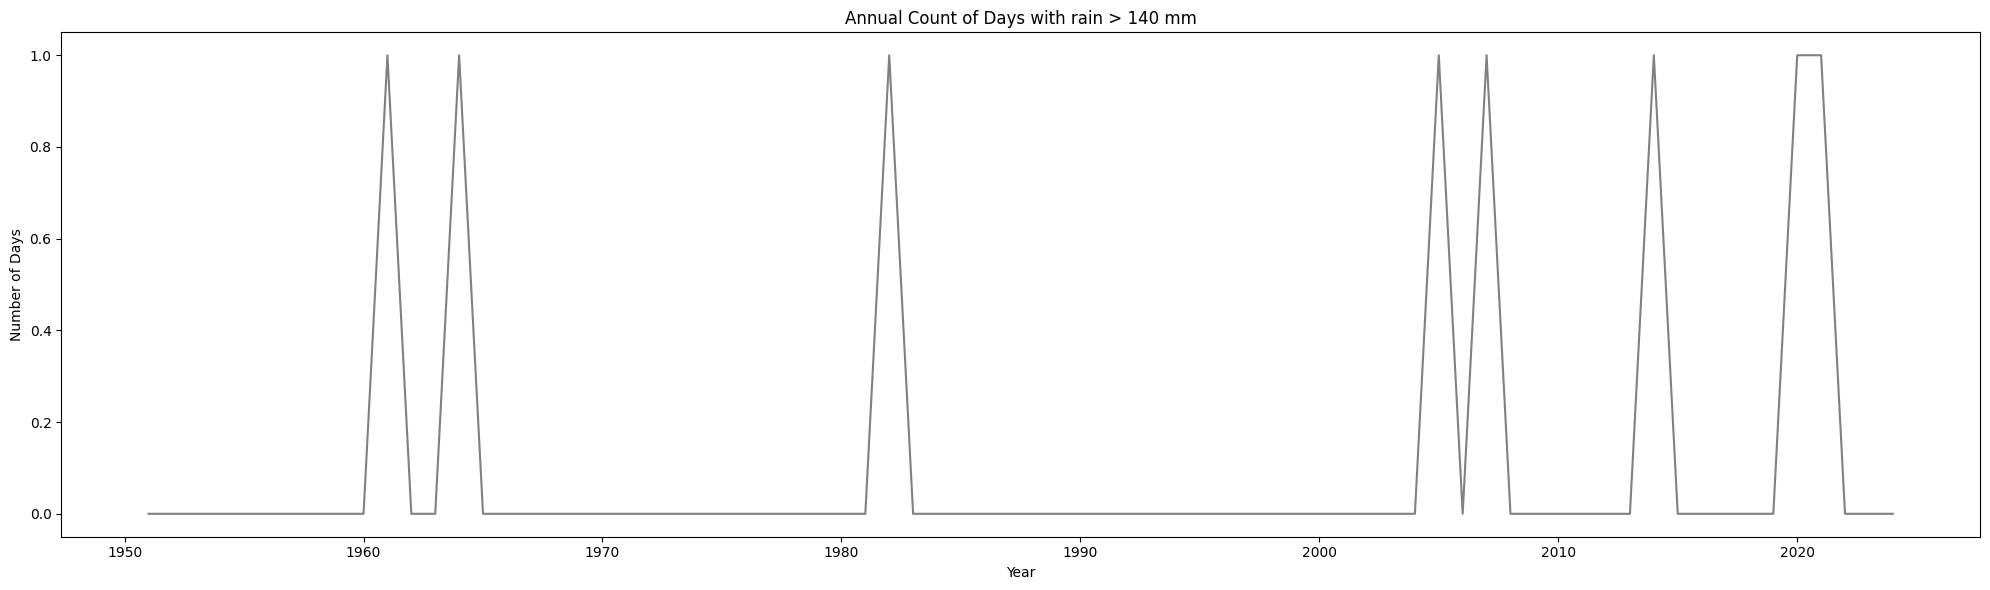

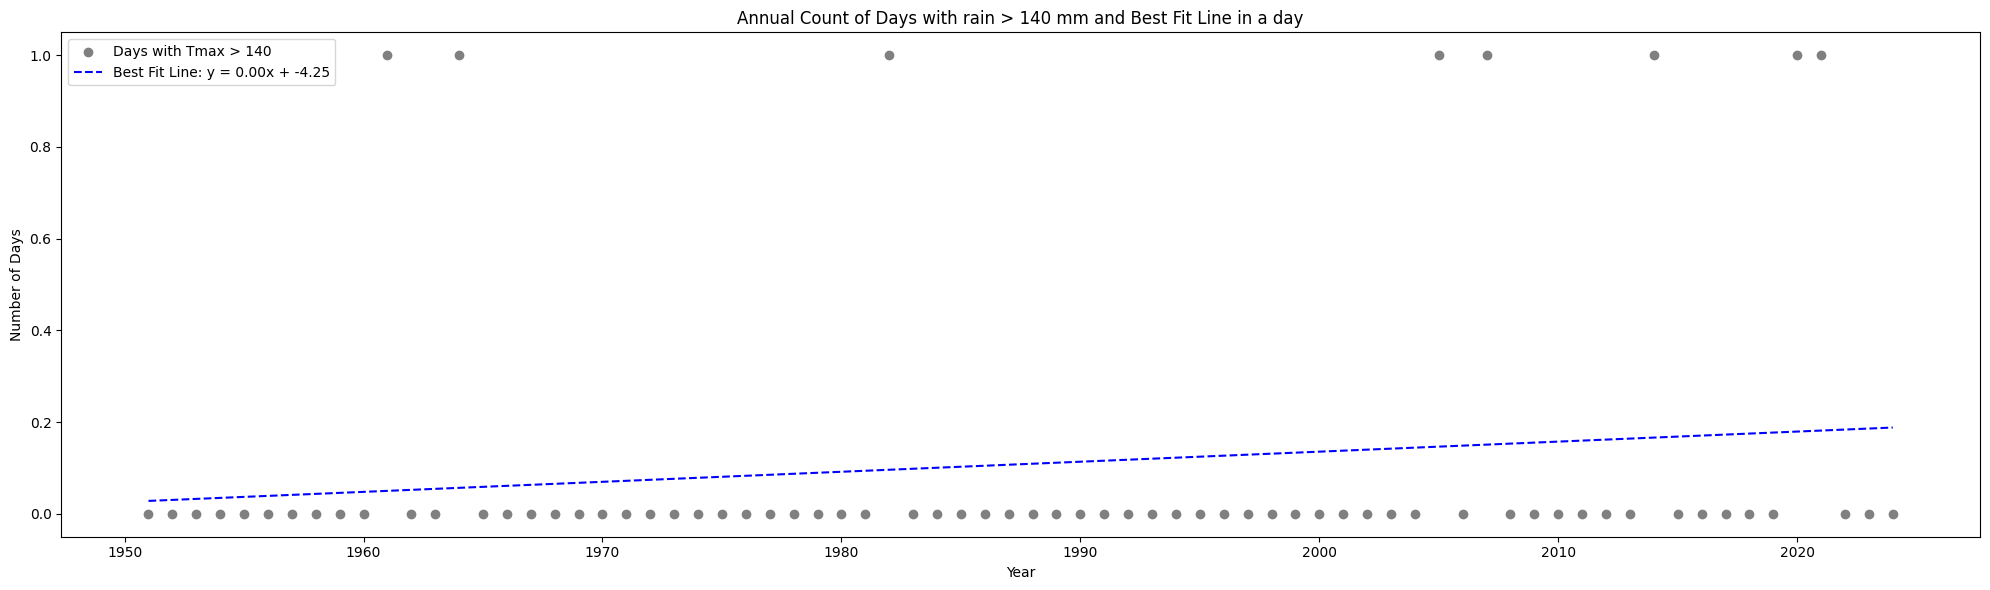

Equation of the best fit line: y = 0.00x + -4.25


In [8]:
x = 140  # You can set any rain threshold here

rain = df['rain']
# Ensure DateTime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Count the number of days each year where rain > x mm
rain_above_x = rain > x
annual_count_above_x = rain_above_x.groupby(df['DateTime'].dt.year).sum()

# Plot the bar graph
plt.figure(figsize=(20, 6))
annual_count_above_x.plot(kind='line', color='grey')
plt.title(f'Annual Count of Days with rain > {x} mm')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()


# Scatter plot and best fit line for annual_count_above_x
years = annual_count_above_x.index.values
counts = annual_count_above_x.values

# Linear regression for best fit line
coefficients = np.polyfit(years, counts, 1)
slope, intercept = coefficients
best_fit_line = slope * years + intercept

plt.figure(figsize=(20, 6))
plt.scatter(years, counts, color='grey', label=f'Days with Tmax > {x}')
plt.plot(years, best_fit_line, color='blue', linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Annual Count of Days with rain > {x} mm and Best Fit Line in a day')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {slope:.2f}x + {intercept:.2f}")

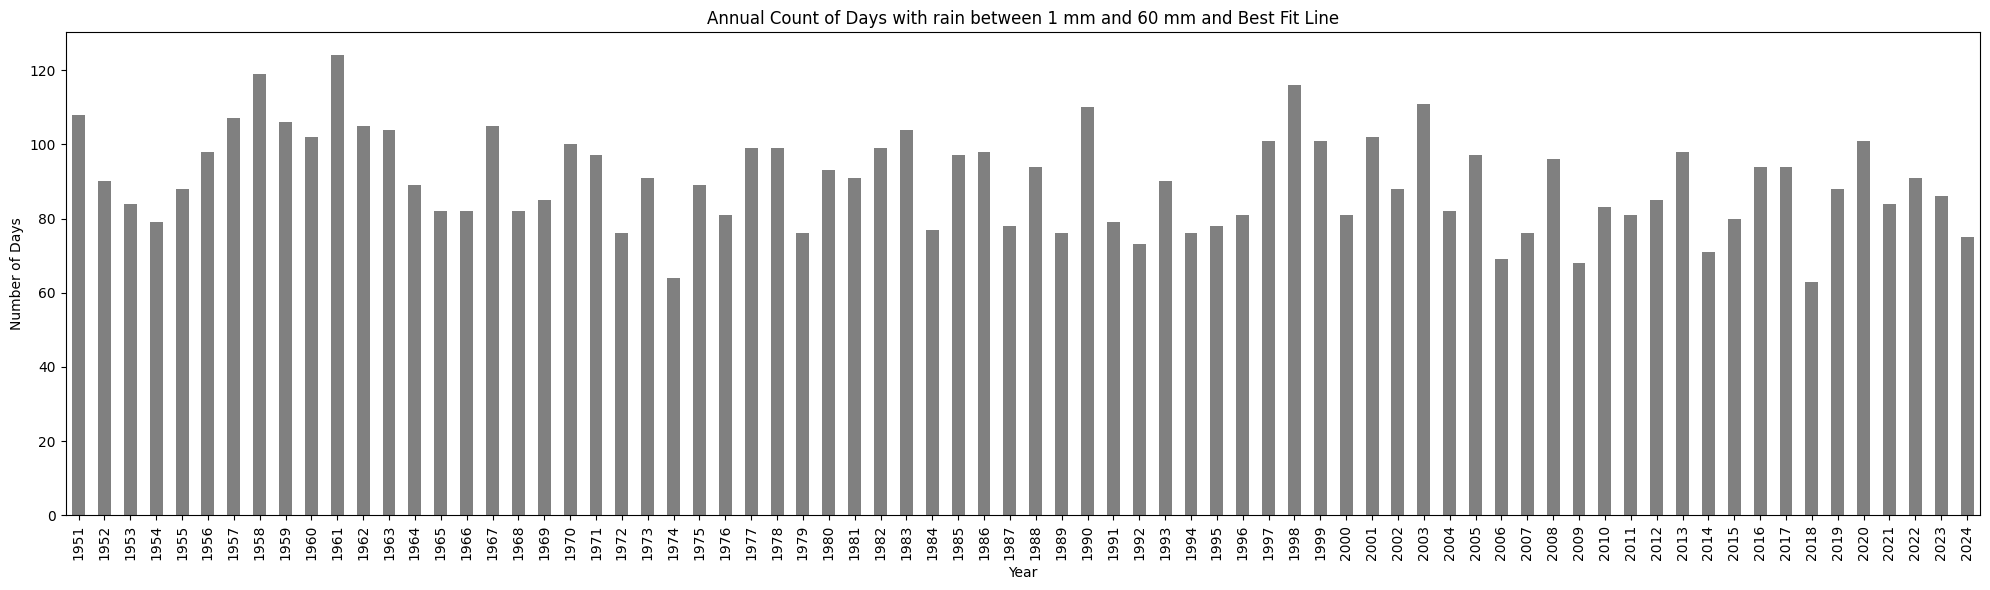

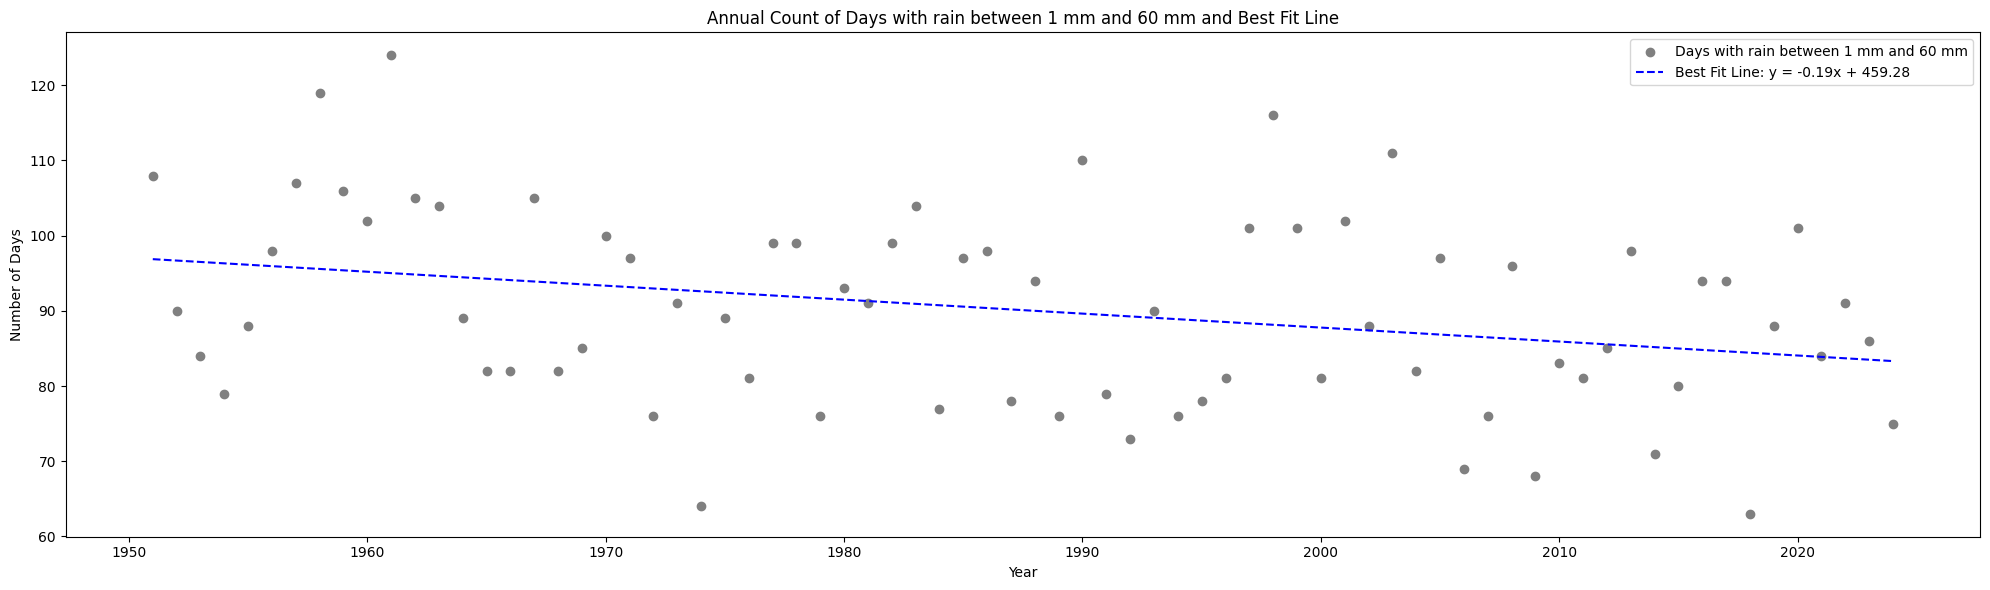

Equation of the best fit line: y = -0.19x + 459.28


In [9]:
x = 1  # You can set any rain between x & y here
y = 60
rain = df['rain']
# Ensure DateTime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Count the number of days each year where rain between x & y mm
rain_above_x = (x < rain)  & (rain < y)
annual_count_above_x = rain_above_x.groupby(df['DateTime'].dt.year).sum()

# Plot the bar graph
plt.figure(figsize=(20, 6))
annual_count_above_x.plot(kind='bar', color='grey')
plt.title(f'Annual Count of Days with rain between {x} mm and {y} mm and Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()


# Scatter plot and best fit line for annual_count_above_x
years = annual_count_above_x.index.values
counts = annual_count_above_x.values

# Linear regression for best fit line
coefficients = np.polyfit(years, counts, 1)
slope, intercept = coefficients
best_fit_line = slope * years + intercept

plt.figure(figsize=(20, 6))
plt.scatter(years, counts, color='grey', label=f'Days with rain between {x} mm and {y} mm')
plt.plot(years, best_fit_line, color='blue', linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Annual Count of Days with rain between {x} mm and {y} mm and Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {slope:.2f}x + {intercept:.2f}")

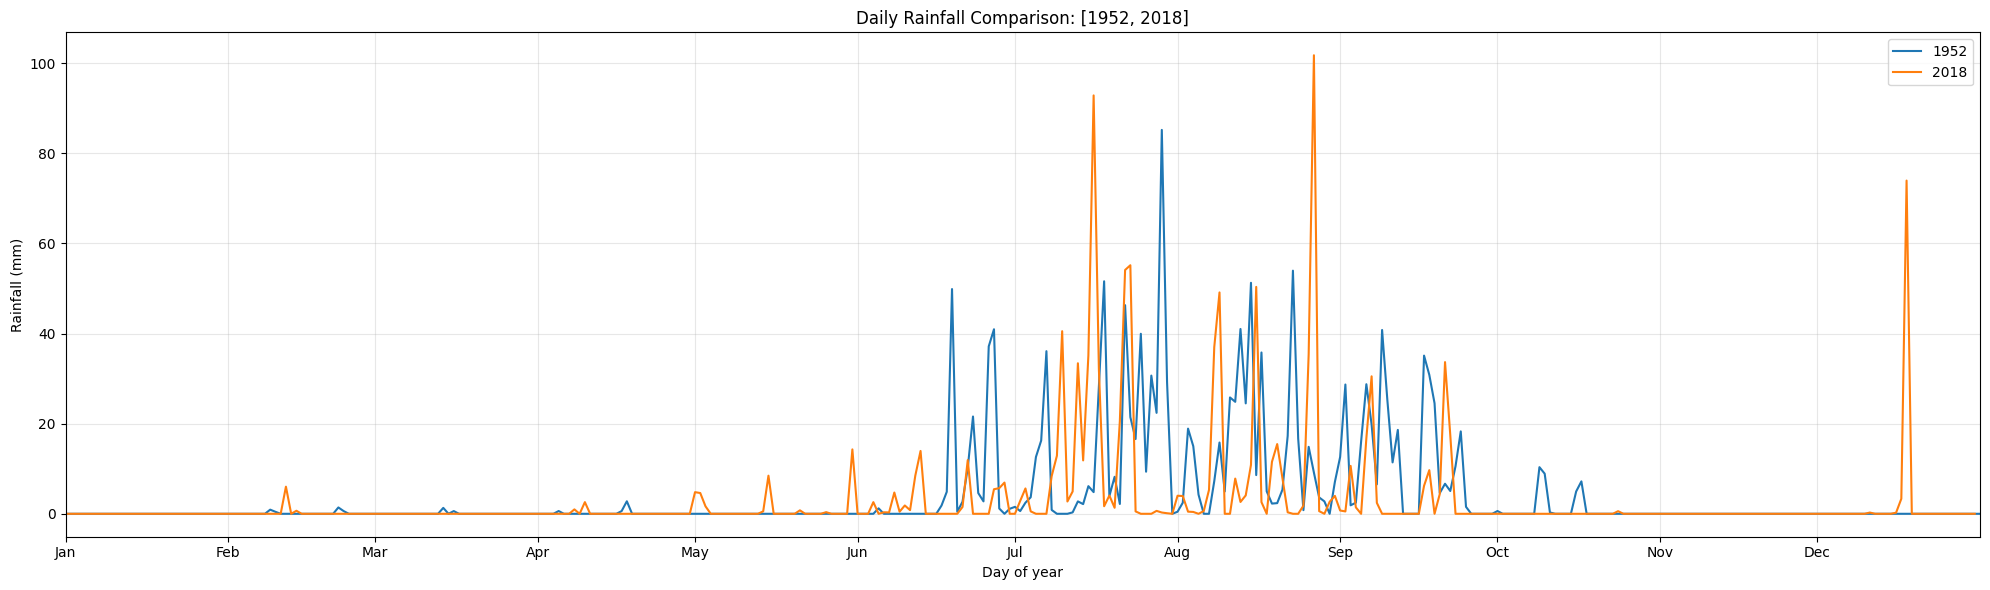

In [10]:
years = [1952, 2018]
plt.figure(figsize=(20, 6))

# Use a full 1.2.366 day-of-year index so leap-year series align on the plot
full_days = np.arange(1, 367)

for y in years:
    yr_df = df[df['DateTime'].dt.year == y]
    if yr_df.empty:
        print(f"No data for year {y}")
        continue
    # Aggregate by day-of-year (sum in case of multiple records per day)
    daily_rain = yr_df.groupby(yr_df['DateTime'].dt.dayofyear)['rain'].sum()
    # Reindex to full range so lines align; missing days become NaN
    daily_rain = daily_rain.reindex(full_days)
    plt.plot(full_days, daily_rain, label=str(y), linewidth=1.5)

# X-axis: month tick positions (use a non-leap reference for consistent month starts)
month_starts = pd.to_datetime([f'2001-{m:02d}-01' for m in range(1, 13)]).dayofyear
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)

plt.xlim(1, 366)
plt.xlabel('Day of year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily Rainfall Comparison: {years}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

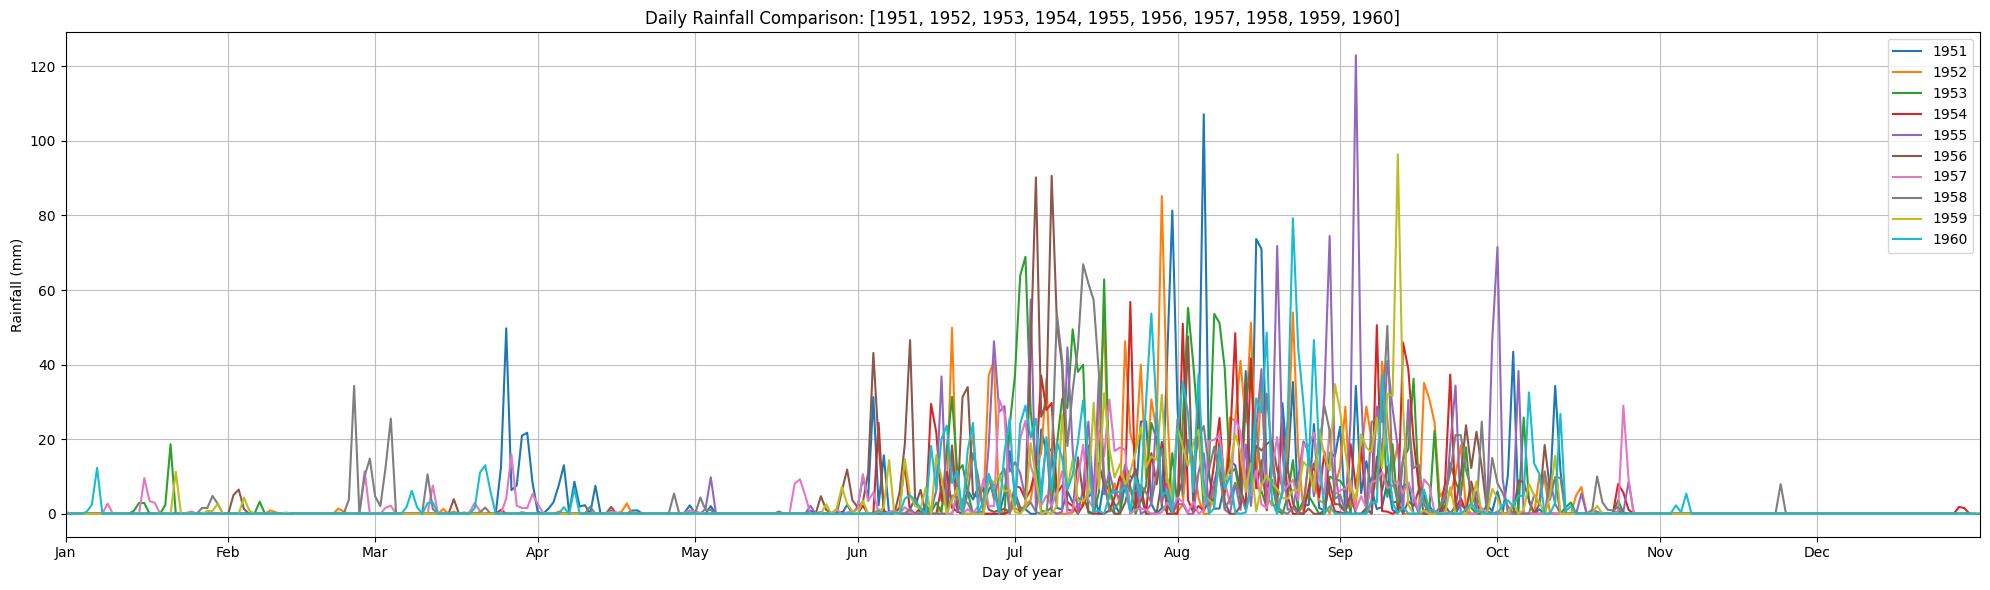

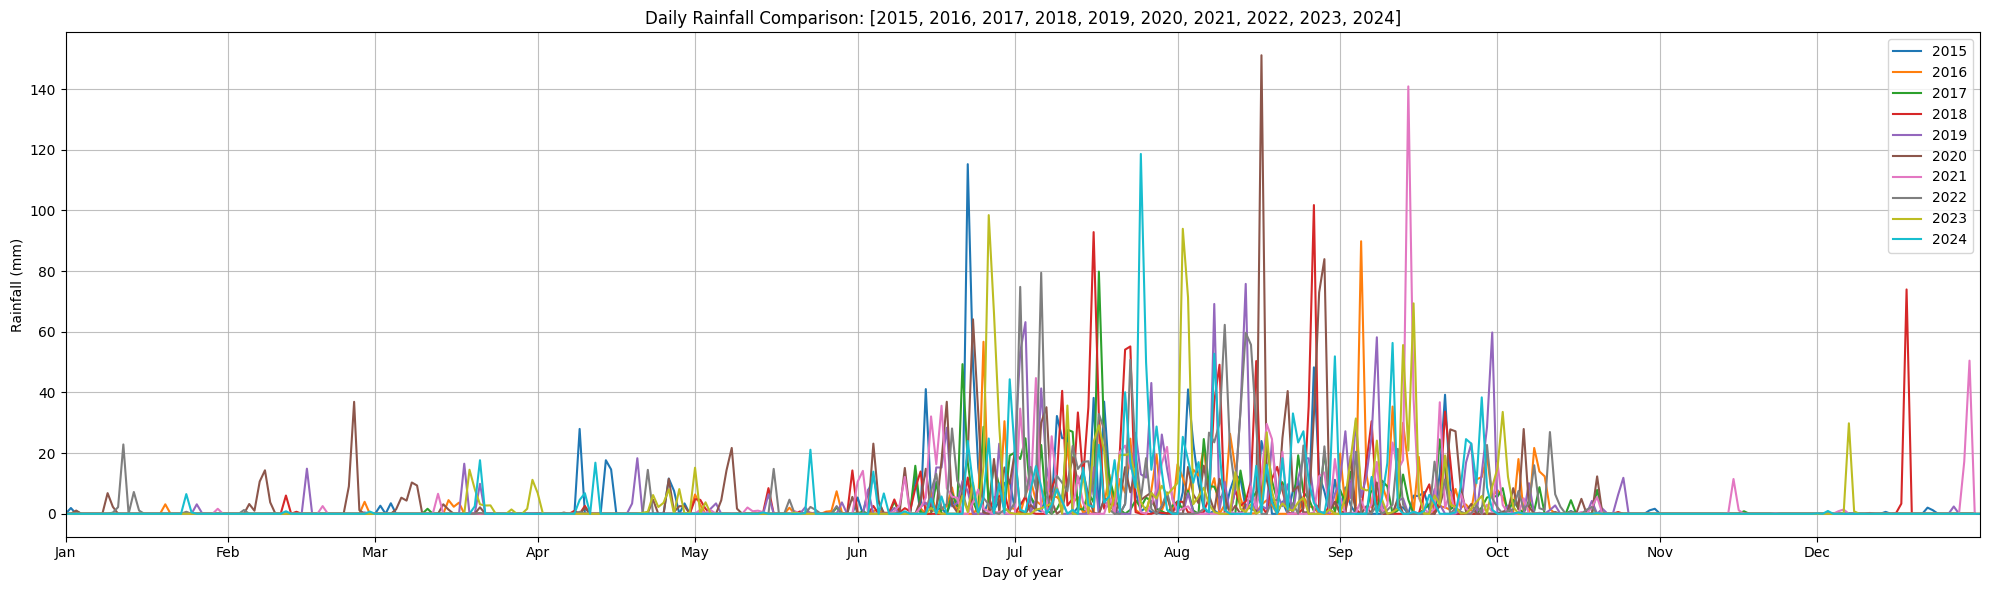

In [11]:
years = [1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960]
plt.figure(figsize=(20, 6))

# Use a full 1..366 day-of-year index so leap-year series align on the plot
full_days = np.arange(1, 367)

for y in years:
    yr_df = df[df['DateTime'].dt.year == y]
    if yr_df.empty:
        print(f"No data for year {y}")
        continue
    # Aggregate by day-of-year (sum in case of multiple records per day)
    daily_rain = yr_df.groupby(yr_df['DateTime'].dt.dayofyear)['rain'].sum()
    # Reindex to full range so lines align; missing days become NaN
    daily_rain = daily_rain.reindex(full_days)
    plt.plot(full_days, daily_rain, label=str(y), linewidth=1.5)

# X-axis: month tick positions (use a non-leap reference for consistent month starts)
month_starts = pd.to_datetime([f'2001-{m:02d}-01' for m in range(1, 13)]).dayofyear
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)

plt.xlim(1, 366)
plt.xlabel('Day of year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily Rainfall Comparison: {years}')
plt.legend()
plt.grid(alpha=0.8)
plt.tight_layout()
plt.show()




years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
plt.figure(figsize=(20, 6))

# Use a full 1..366 day-of-year index so leap-year series align on the plot
full_days = np.arange(1, 367)

for y in years:
    yr_df = df[df['DateTime'].dt.year == y]
    if yr_df.empty:
        print(f"No data for year {y}")
        continue
    # Aggregate by day-of-year (sum in case of multiple records per day)
    daily_rain = yr_df.groupby(yr_df['DateTime'].dt.dayofyear)['rain'].sum()
    # Reindex to full range so lines align; missing days become NaN
    daily_rain = daily_rain.reindex(full_days)
    plt.plot(full_days, daily_rain, label=str(y), linewidth=1.5)

# X-axis: month tick positions (use a non-leap reference for consistent month starts)
month_starts = pd.to_datetime([f'2001-{m:02d}-01' for m in range(1, 13)]).dayofyear
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)

plt.xlim(1, 366)
plt.xlabel('Day of year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily Rainfall Comparison: {years}')
plt.legend()
plt.grid(alpha=0.8)
plt.tight_layout()
plt.show()